# Forecasting

Data source : https://ourworldindata.org/grapher/air-passengers-carried

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unique(liste):
    
    unique = []

    for e in liste:
        if e not in unique:
            unique.append(e)
            
    return unique


def load_data(filepath, country):

    Entity=[]
    Code = []
    Year=[]
    Passengers=[]


    with open(filepath, newline='') as file:

        filereader = csv.reader(file, delimiter=',', quotechar='"')

        for row in filereader:

            if row[1] == country :
            
                Entity.append(row[0])
                Code.append(row[1])
                Year.append(row[2])
                Passengers.append(row[3])
                
    return Entity, Code, Year, Passengers

## Variables

In [3]:

Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')
Entity_usa, Code_usa, Year_usa, Passengers_usa = load_data(filepath='data_input/air-passengers-carried.csv', country='USA')

data_fra = zip(Year_fra, Passengers_fra)
data_usa = zip(Year_usa, Passengers_usa)

print(Entity_fra[:1], Entity_fra[-1:])
print(Code_fra[:1], Code_fra[-1:])
print(Year_fra[:1], Year_fra[-1:])
print(Passengers_fra[:1], Passengers_fra[-1:])


['France'] ['France']
['FRA'] ['FRA']
['1970'] ['2021']
['9108000'] ['32000528']


## Triple exponential smoothing : Holt-Winter

### With statsmodels

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing

In [5]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/cedric/Documents/SupplyTools/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


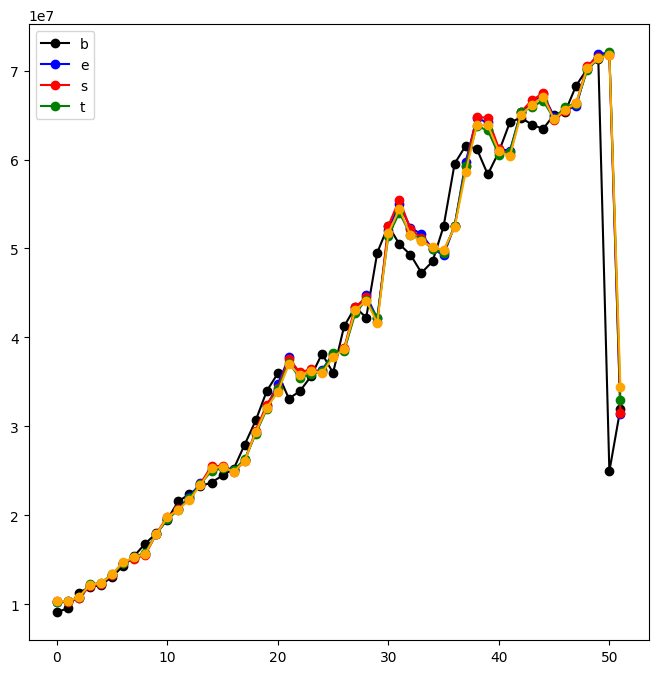

In [6]:
fit1 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="add",use_boxcox=True,initialization_method="estimated",).fit()
fit2 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="mul",use_boxcox=True,initialization_method="estimated",).fit()
fit3 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="add",damped_trend=True,use_boxcox=True,initialization_method="estimated",).fit()
fit4 = ExponentialSmoothing(y,seasonal_periods=4,trend="add",seasonal="mul",damped_trend=True,use_boxcox=True,initialization_method="estimated",).fit()

plt.figure(figsize=(8, 8))
plt.plot(y, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
plt.plot(fit4.fittedvalues, marker="o", color="orange")
plt.legend('best')

plt.show();